In [1]:
import time
import random
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

In [2]:
torch.cuda.is_available()

True

In [3]:
train = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/submission.csv')

In [4]:
train.set_index('id').head()

,digit,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
id,,,,,,,,,,,,,,,,,,,,,
1,5,L,1,1,1,4,3,0,0,4,...,2,1,0,1,2,4,4,4,3,4
2,0,B,0,4,0,0,4,1,1,1,...,0,3,0,1,4,1,4,2,1,2
3,4,L,1,1,2,2,1,1,1,0,...,3,3,3,0,2,0,3,0,2,2
4,9,D,1,2,0,2,0,4,0,3,...,3,3,2,0,1,4,0,0,1,1
5,6,A,3,0,2,4,0,3,0,4,...,4,4,3,2,1,3,4,3,1,2


In [5]:
train.shape

(2048, 787)

In [6]:
test.set_index('id').head()

,letter,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
id,,,,,,,,,,,,,,,,,,,,,
2049,L,0,4,0,2,4,2,3,1,0,...,2,0,4,2,2,4,3,4,1,4
2050,C,4,1,4,0,1,1,0,2,2,...,0,3,2,4,2,4,2,2,1,2
2051,S,0,4,0,1,3,2,3,0,2,...,1,3,2,0,3,2,3,0,1,4
2052,K,2,1,3,3,3,4,3,0,0,...,3,0,3,2,4,1,0,4,4,4
2053,W,1,0,1,1,2,2,1,4,1,...,4,3,1,4,0,2,1,2,3,4


In [7]:
test.shape

(20480, 786)

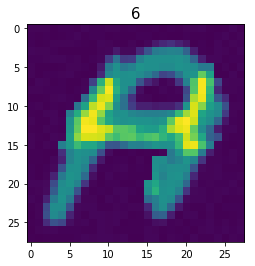

In [8]:
i = 0
img = train.query("letter == 'A'")[
        [(str(i)) for i in range(784)]
    ].iloc[28].values.reshape(28, 28)
plt.imshow(img)
plt.title(train.query("letter == 'A'").iloc[i]['digit'], fontsize=15)
plt.show()

In [9]:
train.query("letter == 'A'").iloc[28].iloc[:3]

id        774
digit       4
letter      A
Name: 773, dtype: object

In [10]:
from scipy.signal import correlate2d

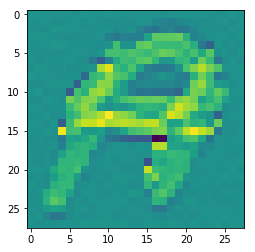

In [11]:
kernel = np.array(
    [
        [0, -100, 0],
        [0, 255, 0],
        [0, -100, 0],
    ]
)
plt.imshow(correlate2d(img, kernel, mode='same'))

In [12]:
X_train = pd.concat(
    (pd.get_dummies(train.letter), train[[str(i) for i in range(784)]]), 
    axis=1)
y_train = train['digit']

In [13]:
X_train.head()

,A,B,C,D,E,F,G,H,I,J,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,2,4,4,4,3,4
1,0,1,0,0,0,0,0,0,0,0,...,0,3,0,1,4,1,4,2,1,2
2,0,0,0,0,0,0,0,0,0,0,...,3,3,3,0,2,0,3,0,2,2
3,0,0,0,1,0,0,0,0,0,0,...,3,3,2,0,1,4,0,0,1,1
4,1,0,0,0,0,0,0,0,0,0,...,4,4,3,2,1,3,4,3,1,2


In [14]:
y_train

0       5
1       0
2       4
3       9
4       6
5       8
6       1
7       3
8       6
9       8
10      8
11      2
12      3
13      3
14      9
15      0
16      7
17      7
18      8
19      3
20      5
21      0
22      0
23      6
24      4
25      7
26      3
27      5
28      0
29      3
       ..
2018    1
2019    0
2020    8
2021    5
2022    7
2023    7
2024    9
2025    7
2026    5
2027    9
2028    6
2029    8
2030    4
2031    2
2032    6
2033    0
2034    7
2035    8
2036    4
2037    6
2038    4
2039    3
2040    2
2041    2
2042    6
2043    6
2044    1
2045    9
2046    0
2047    5
Name: digit, Length: 2048, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

In [16]:
!pip install lightgbm
!sudo -H pip install --upgrade --ignore-installed pip setuptools
!apt-get -qq install --no-install-recommends nvidia-375
!apt-get -qq install --no-install-recommends nvidia-opencl-icd-375 nvidia-opencl-dev opencl-headers
!apt-get -qq install --no-install-recommends git cmake build-essential libboost-dev libboost-system-dev libboost-filesystem-dev
!pip3 install -qq lightgbm --install-option=--gpu
!sudo python3 -m pip install -U pip
!sudo python3 -m pip install -U setuptools

from lightgbm import LGBMClassifier
lgb = LGBMClassifier(device='gpu')

Looking in indexes: http://ftp.daumkakao.com/pypi/simple
You are using pip version 10.0.1, however version 21.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/94/b0/e10bdc8809c81796c80aa3644a8e3dc16594fb1bd68f5996929f26cad980/pip-21.1.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/fc/0a/b486efab52f8ad03c3eca0c998dd3deafba0c39b29e0c49c68a7152c8b2d/setuptools-56.2.0.tar.gz
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "setuptools/__init__.py", line 16, in <module>
        import setuptools.version
      File "setuptools/version.py", line 1, in <module>
        import pkg_resources
      File "pkg_resources/__init__.py", line 1367
        raise SyntaxError(e) from e
                                ^
    SyntaxError: invalid syntax
    
    -------------------------------

In [17]:
lgb.fit(X_train, y_train)

LightGBMError: GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1

In [ ]:
print((lgb.predict(X_valid) == y_valid.values).sum() / len(y_valid))

In [ ]:
X_test = pd.concat(
    (pd.get_dummies(test.letter), test[[str(i) for i in range(784)]]), 
axis=1)
submission.digit = lgb.predict(X_test)
submission.to_csv('first_submission.csv', index=False) # 57.84313725% 의 결과를 얻음